# Loading MNIST data

In [ ]:
# MNIST -- (x_train, labels_train), (x_test, labels_test) y_train y_test
from tensorflow.keras.datasets import mnist
(x_train, labels_train), (x_test, labels_test) = mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(labels_train, 10)
y_test = to_categorical(labels_test, 10)
#  dense layer
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
# convolution layer
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)


# EMNIST -- (input_train, target_train), (input_test, target_test) y_train_emnist y_test_emnist
!pip install extra-keras-datasets
from extra_keras_datasets import emnist
(input_train, target_train), (input_test, target_test) = emnist.load_data(type='digits')
# print(input_train.shape, target_train.shape)
# print(input_test.shape, target_test.shape)
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')
input_train /= 255
input_test /= 255
from tensorflow.keras.utils import to_categorical
y_train_emnist = to_categorical(target_train, 10)
y_test_emnist = to_categorical(target_test, 10)
#  dense layer
input_train = input_train.reshape(240000, 784)
input_test = input_test.reshape(40000, 784)
# convolution layer
input_train = input_train.reshape(input_train.shape[0], 28, 28, 1)
input_test = input_test.reshape(input_test.shape[0], 28, 28, 1)


INFO:root:Loading dataset = emnist


# Defining neural network

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.layers import Flatten, Lambda, BatchNormalization

from keras.layers import Dense
from keras.regularizers import l2

# different layers https://keras.io/layers/  e.g.:

net = Sequential()
net.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=(28,28,1)))
net.add(MaxPool2D(pool_size=(2, 2)))
net.add(Conv2D(32, (3, 3), activation='relu'))
net.add(MaxPool2D(pool_size=(2, 2)))
net.add(Flatten())
net.add(Dense(256, activation='relu'))
net.add(Dropout(rate=0.5))
net.add(Dense(10, activation='softmax'))
net.compile(loss='categorical_crossentropy', optimizer='adam')

# net.summary()
# Check total parameters

#  Training neural network

In [ ]:
# epochs = number of epochs to train the model (an epoch is an iteration over the entire x and y data provided)
# Batch size = numbers of samples per gtadient update
# 一个 epoch 表示一次全量训练样例的前向和后向传播。batch_size 就是在一次前向／后向传播过程用到的训练样例的数量
batch_size = 256
num_epoch = 15
history = net.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=batch_size, epochs=num_epoch)


Epoch 1/15
235/235 [==============================] - 40s 167ms/step - loss: 0.3558 - val_loss: 0.0745
Epoch 2/15
235/235 [==============================] - 40s 169ms/step - loss: 0.0922 - val_loss: 0.0469
Epoch 3/15
235/235 [==============================] - 40s 172ms/step - loss: 0.0650 - val_loss: 0.0330
Epoch 4/15
235/235 [==============================] - 40s 170ms/step - loss: 0.0519 - val_loss: 0.0306
Epoch 5/15
235/235 [==============================] - 40s 169ms/step - loss: 0.0451 - val_loss: 0.0277
Epoch 6/15
235/235 [==============================] - 40s 168ms/step - loss: 0.0380 - val_loss: 0.0258
Epoch 7/15
235/235 [==============================] - 39s 168ms/step - loss: 0.0339 - val_loss: 0.0261
Epoch 8/15
235/235 [==============================] - 39s 168ms/step - loss: 0.0302 - val_loss: 0.0240
Epoch 9/15
235/235 [==============================] - 40s 168ms/step - loss: 0.0272 - val_loss: 0.0215
Epoch 10/15
235/235 [==============================] - 39s 165ms/step - l

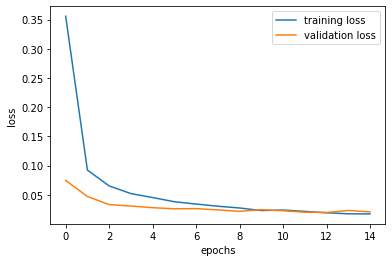

In [ ]:

# The history variable returned by the fit function can be used to produce a plot showing the
# change in the cost function during training:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [ ]:
####################################################
# net.save("network_for_mnist.h5")

# from tensorflow.keras.models import load_model
# net=load_model("network_for_mnist.h5")

# Data for testing

In [ ]:
import numpy as np
import os
from tensorflow.keras.models import load_model
# #load .h5 file of arbitrary name for testing (last if more than one)
# print(os.getcwd())
# for file in os.listdir(os.getcwd()):
#  if file.endswith(".h5"):
#  print(file)
#  net=load_model(file)
# net.summary()

#determine what type of network this is
conf=net.layers[0].get_config()
inshape=conf['batch_input_shape']
if inshape[1]==28:
 netType='CNN'
else:
 netType='MLP'

#test with MNIST data
outputs=net.predict(x_test)
labels_predicted=np.argmax(outputs, axis=1)
correct_classified=sum(labels_predicted==labels_test)
print('Percentage correctly classified MNIST= ',100*correct_classified/labels_test.size)
                       
#test with EMNIST data
outputs=net.predict(input_test)
labels_predicted=np.argmax(outputs, axis=1)
correct_classified=sum(labels_predicted==target_test)
print('Percentage correctly classified EMNIST=',100*correct_classified/target_test.size)


Percentage correctly classified MNIST=  99.33
Percentage correctly classified EMNIST= 93.6625


In [ ]:
import pandas as pd
pd.crosstab(target_test,labels_predicted,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,3982,2,4,0,2,0,3,0,3,4
1,3,3944,2,0,19,4,24,2,2,0
2,4,12,3953,10,5,0,7,4,3,2
3,1,1,11,3954,0,27,0,4,2,0
4,6,12,0,0,3893,1,13,40,31,4
5,4,0,1,6,0,3960,4,17,5,3
6,21,26,44,0,0,8,3898,0,3,0
7,1,111,223,1,15,0,0,3646,2,1
8,11,14,7,7,10,56,9,6,3875,5


In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')
# !pip install pyyaml h5py  # Required to save models in HDF5 format

net.save("network_for_mnist_data15.h5")
